In [2]:
def plot_figures(opt_names, model_params):
    plt.figure(figsize=(15,5))
    for opt_name in opt_names:
        directory = get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, **model_params[opt_name])

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)


        cur_epochs = train_graphs.log_epochs
        plt.subplot(2,5,2)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')


        plt.subplot(2,5,3)
        plt.semilogy(cur_epochs, train_graphs.eigs)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Sharpness')

        plt.subplot(2,5,4)
        plt.semilogy(cur_epochs, train_graphs.test_loss)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Loss')

        plt.subplot(2,5,5)
        plt.plot(cur_epochs, train_graphs.eigs_test)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Sharpness')
    
    plt.legend(opt_names)
    plt.tight_layout()
    plt.show()
    

In [4]:
def plot_figures_goldstein(gold_deltas):
    plt.figure(figsize=(15,5))
    for gold_delta in gold_deltas:
        directory = get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, gold_delta=gold_delta)

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)


        cur_epochs = train_graphs.log_epochs
        plt.subplot(2,5,2)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')


        plt.subplot(2,5,3)
        plt.semilogy(cur_epochs, train_graphs.eigs)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Sharpness')

        plt.subplot(2,5,4)
        plt.plot(cur_epochs, train_graphs.test_loss)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Loss')

        plt.subplot(2,5,5)
        plt.plot(cur_epochs, train_graphs.eigs_test)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Sharpness')

    plt.tight_layout()
    plt.show()

In [29]:
def plot_figures_rhos(rhos, model_params):
    plt.figure(figsize=(15,5))
    for rho in rhos:
        model_param = model_params[rho]
        directory = get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, **model_param)

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)


        cur_epochs = train_graphs.log_epochs
        plt.subplot(2,5,2)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')


        plt.subplot(2,5,3)
        plt.semilogy(cur_epochs, train_graphs.eigs)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Sharpness')

        plt.subplot(2,5,4)
        plt.semilogy(cur_epochs, train_graphs.test_loss)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Loss')

        plt.subplot(2,5,5)
        plt.plot(cur_epochs, train_graphs.eigs_test)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Sharpness')

    plt.tight_layout()
    plt.show()

def plot_figures_opts(opts, model_params):
    plt.figure(figsize=(15,5))
    for opt_name in opts:
        model_param = model_params[opt_name]
        directory = get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, **model_param)

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)


        cur_epochs = train_graphs.log_epochs
        plt.subplot(2,5,2)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')


        plt.subplot(2,5,3)
        print(train_graphs.eigs)
        plt.semilogy(cur_epochs, train_graphs.eigs)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Sharpness')

        plt.subplot(2,5,4)
        plt.semilogy(cur_epochs, train_graphs.test_loss)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Loss')

        plt.subplot(2,5,5)
        plt.plot(cur_epochs, train_graphs.eigs_test)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Sharpness')

    plt.legend(opts)
    plt.tight_layout()
    plt.show()

In [3]:
import sys
sys.path.append('..')
from main import graphs
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

loss_name = 'MSELoss'

def get_lookup_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, **kwargs):
    results_dir = "results"
    directory = f"{results_dir}/{dataset_name}/{opt_name}/{model_name}/"
    for key, value in kwargs.items():
        directory += f"{key}_{value}/"
    directory += f"lr_{lr}/wd_{weight_decay}/batch_size_{batch_size}/"
    return directory

def get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, **kwargs):
    #results_dir = "results"
    #directory = f"{results_dir}/{model_name}/{dataset_name}/{opt_name}/lr_{lr}/wd_{weight_decay}/batch_size_{batch_size}/epoch_{epochs}/"
    directory = get_lookup_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, **kwargs) + f"epoch_{epochs}/"
    print(directory)
    return directory

In [ ]:
! python main.py --dataset spurious --model 2-mlp-sim-bn --loss MSELoss --opt sgd --lr 0.01 --epoch 2000 --analysis loss eigs --batch_size 128 --sp_train_size 512

### Observation: feat size = 50 sam doesn't work! feat_size = 20 works.

results/spurious/sam/2-mlp-sim-bn/feat_dim_50/train_size_512/sam_rho_0.002/lr_0.01/wd_0/batch_size_128/epoch_4000/
results/spurious/sam/2-mlp-sim-bn/feat_dim_50/train_size_512/sam_rho_0.02/lr_0.01/wd_0/batch_size_128/epoch_4000/
results/spurious/sam/2-mlp-sim-bn/feat_dim_50/train_size_512/sam_rho_0.2/lr_0.01/wd_0/batch_size_128/epoch_4000/


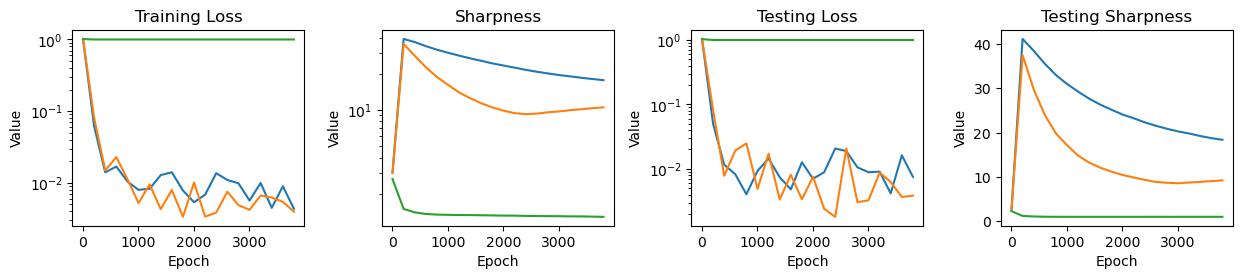

In [17]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sam", 0, 128, 512, 4000
model_name = "2-mlp-sim-bn"
model_params = {}
#model_params["sgd"] = {"train_size": 512}
#model_params["norm-sgd"] = {"train_size": 512}
model_params[0.002] = {"feat_dim":50, "train_size": 512, "sam_rho":0.002}
model_params[0.02] = {"feat_dim":50, "train_size": 512, "sam_rho":0.02}
model_params[0.2] = {"feat_dim":50, "train_size": 512, "sam_rho":0.2}
#directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

#with open(f'../{directory}train_graphs.pk', 'rb') as f:
#    train_graphs = pickle.load(f)

plot_figures_rhos([0.002, 0.02, 0.2], model_params)

In [ ]:
! python main.py --dataset spurious --model 2-mlp-sim-bn --loss MSELoss --opt sam --lr 0.01 --epoch 4000 --analysis loss eigs --batch_size 128 --sp_train_size 512 --sp_feat_dim 20 --sam_rho 0.2

results/spurious/sam/2-mlp-sim-bn/feat_dim_50/train_size_512/sam_rho_0.02/lr_0.01/wd_0/batch_size_128/epoch_4000/
results/spurious/sgd/2-mlp-sim-bn/feat_dim_50/train_size_512/lr_0.01/wd_0/batch_size_128/epoch_4000/
results/spurious/norm-sgd/2-mlp-sim-bn/feat_dim_50/train_size_512/lr_0.01/wd_0/batch_size_128/epoch_4000/


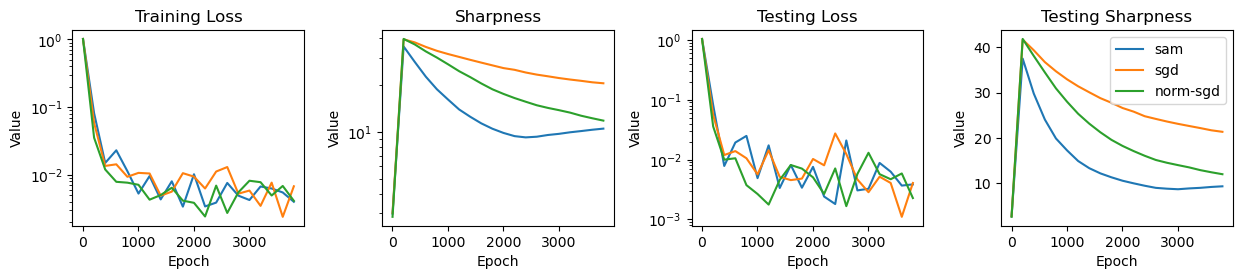

In [23]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sam", 0, 128, 512, 4000
model_name = "2-mlp-sim-bn"
model_params = {}
model_params["sam"] = {"feat_dim":50, "train_size": 512, "sam_rho":0.02}
model_params["sgd"] = {"feat_dim":50, "train_size": 512}
model_params["norm-sgd"] = {"feat_dim":50, "train_size": 512}

plot_figures_opts(["sam", "sgd", "norm-sgd"], model_params)

results/spurious/sam/2-mlp-sim-bn/feat_dim_50/train_size_128/sam_rho_0.02/lr_0.01/wd_0/batch_size_32/epoch_8000/
results/spurious/sgd/2-mlp-sim-bn/feat_dim_50/train_size_128/lr_0.01/wd_0/batch_size_32/epoch_8000/
results/spurious/norm-sgd/2-mlp-sim-bn/feat_dim_50/train_size_128/lr_0.01/wd_0/batch_size_32/epoch_8000/


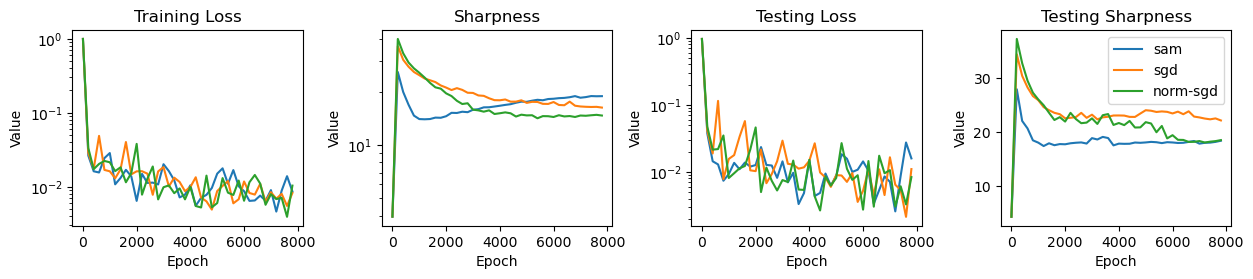

In [27]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sam", 0, 32, 128, 8000
model_name = "2-mlp-sim-bn"
model_params = {}
model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.02}
model_params["sgd"] = {"feat_dim":50, "train_size": train_size}
model_params["norm-sgd"] = {"feat_dim":50, "train_size": train_size}

plot_figures_opts(["sam", "sgd", "norm-sgd"], model_params)

results/spurious/norm-sgd/2-mlp-sim-bn/feat_dim_50/train_size_64/lr_0.01/wd_0/batch_size_1/epoch_4000/
[40.07664489746094, 82.74381256103516, 104.97119903564453, 116.95368957519531, 149.10403442382812, 160.9030303955078, 156.8080596923828, 161.5004425048828, 166.10597229003906, 173.58328247070312, 174.07411193847656, 174.72518920898438, 175.2303009033203, 176.09994506835938, 181.3025360107422, 181.14703369140625, 177.2205352783203, 179.76808166503906, 178.53421020507812, 191.2803955078125]
results/spurious/sgd/2-mlp-sim-bn/feat_dim_50/train_size_64/lr_0.01/wd_0/batch_size_1/epoch_4000/
[33.9761962890625, 40.882171630859375, 47.141841888427734, 43.074668884277344, 60.68046188354492, 57.00398254394531, 63.91093063354492, 57.18663787841797, 58.99666213989258, 71.21748352050781, 96.11060333251953, 48.351810455322266, 51.2353401184082, 48.33715057373047, 67.24315643310547, 36.15210723876953, 53.25956726074219, 51.116416931152344, 69.54124450683594, 73.21763610839844]
results/spurious/sam/2-

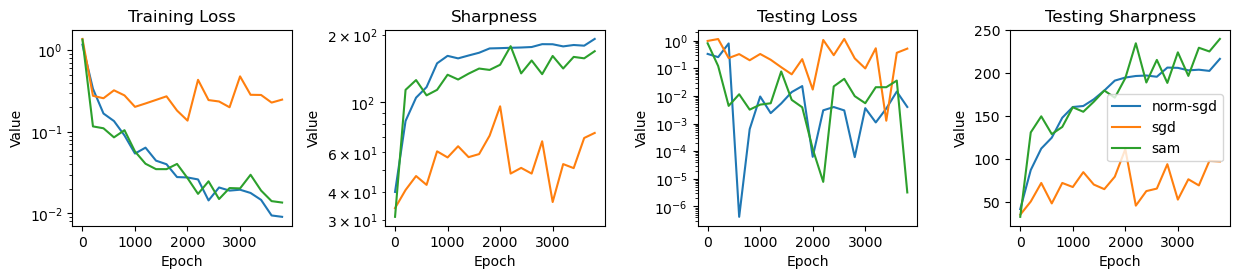

In [42]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sam", 0, 1, 64, 4000
model_name = "2-mlp-sim-bn"
model_params = {}
model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.02}
model_params["sgd"] = {"feat_dim":50, "train_size": train_size}
model_params["norm-sgd"] = {"feat_dim":50, "train_size": train_size}

plot_figures_opts(["norm-sgd","sgd", "sam"], model_params)

In [ ]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sgd", 0, 128, 512, 4000
model_name = "2-mlp-sim-bn"
model_params = {}
#model_params["sgd"] = {"train_size": 512}
#model_params["norm-sgd"] = {"train_size": 512}
model_params[0.002] = {}
model_params[0.02] = {}
model_params[0.2] = {}
#directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

#with open(f'../{directory}train_graphs.pk', 'rb') as f:
#    train_graphs = pickle.load(f)

plot_figures_lrs([0.002, 0.02], model_params)